In [4]:
9

9

In [1]:
import cv2

In [2]:
cv2.__version__

'4.1.2'

In [2]:
import imutils
import cv2
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread(r"C:\Users\laksh\Desktop\MachineLearningWorkspace\Portfolio\Classification.png")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
cv2.imshow("Image", image)
cv2.waitKey(0)

width=1224, height=619, depth=3


-1

In [3]:
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=255, G=255, B=255


In [4]:
roi = image[60:160, 320:420]
cv2.imshow("ROI", roi)
cv2.waitKey(0)

-1

In [5]:
resized = cv2.resize(image, (200, 200))
cv2.imshow("Fixed Resizing", resized)
cv2.waitKey(0)

-1

In [7]:
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)
cv2.waitKey(0)

-1

In [9]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("OpenCV Rotation", rotated)
cv2.waitKey(0)


-1

In [10]:
rotated = imutils.rotate_bound(image, 45)
cv2.imshow("Imutils Bound Rotation", rotated)
cv2.waitKey(0)

-1

In [11]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)

-1

In [13]:
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 255, 0), 2)
cv2.imshow("Rectangle", output)
cv2.waitKey(0)

-1

In [15]:
output = image.copy()
cv2.putText(output, "OpenCV + stats!!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.imshow("Text", output)
cv2.waitKey(0)

-1

In [16]:
2+3

5

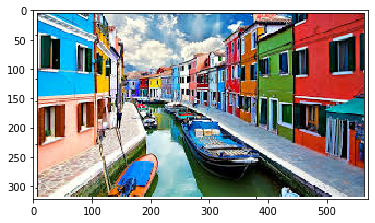

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import the image
img = cv2.imread("open_cv_test.png")
plt.imshow(img)

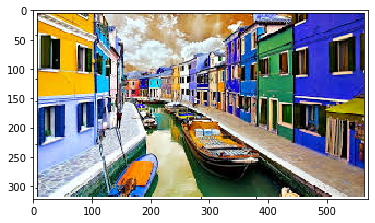

In [24]:
# Convert the image into RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

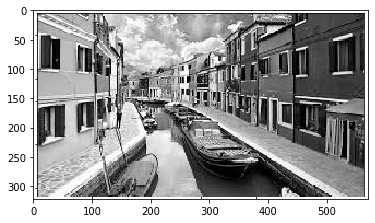

In [25]:
# Convert the image into gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

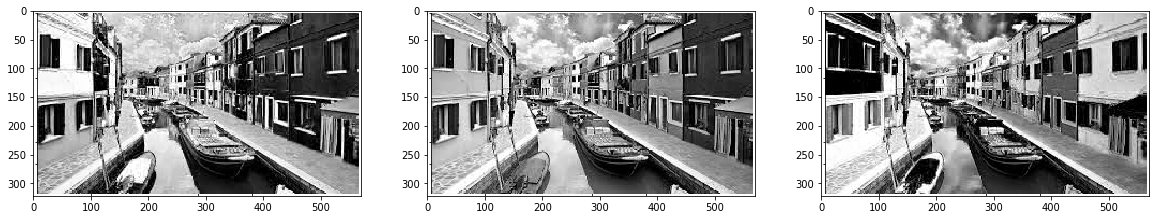

In [26]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

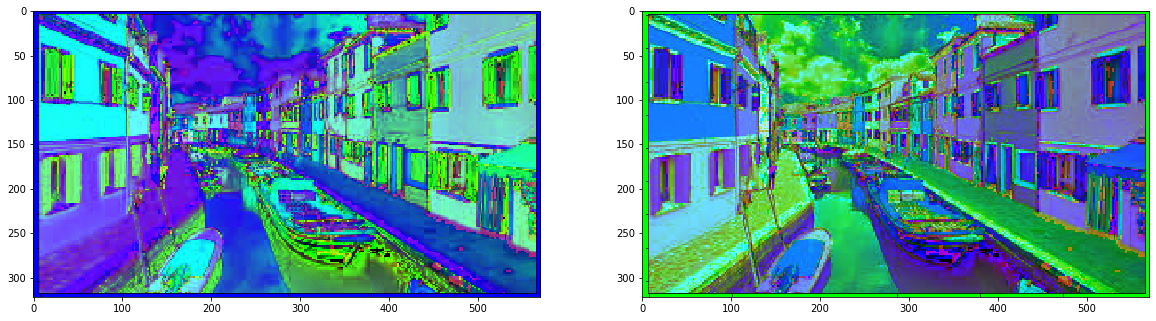

Wall time: 647 ms


In [28]:
%%time

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

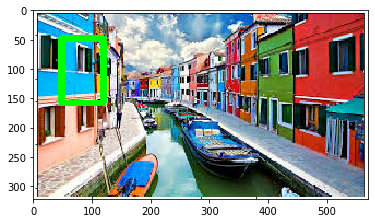

In [36]:
# Copy the image
img_copy = img.copy()
# Draw a rectangle 
cv2.rectangle(img_copy, pt1 = (48, 48), pt2 = (120, 158), 
              color = (0, 255, 0), thickness = 10)
plt.imshow(img_copy)

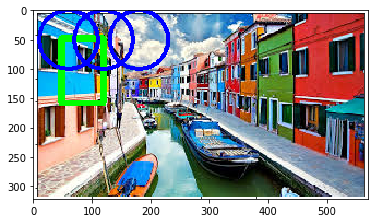

In [42]:
cv2.circle(img_copy, center = (180, 50), radius = 50, 
           color = (0, 0, 255), thickness = 5)
plt.imshow(img_copy)

In [48]:
# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(img, center = (x, y), radius = 5, 
                       color = (87, 184, 237), thickness = -1)
    elif event == cv2.EVENT_RBUTTONDOWN:        
            cv2.circle(img, center = (x, y), radius = 10,  
                       color = (87, 184, 237), thickness = 1)

In [59]:
# Step 2. Call the window
img = cv2.imread('open_cv_test.png')
cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)

while True:
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()


In [61]:
import cv2
import numpy as np

# Step 1. Define callback function
drawing = False
ix = -1
iy = -1

def draw_rectangle(event, x, y, flags, params):

    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                          color = (87, 184, 237), thickness = -1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                      color = (87, 184, 237), thickness = -1)
        
    
# Step 2. Call the window
img = cv2.imread('open_cv_test.png')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)


# Step 3. Execution 
while True: 
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()